<a href="https://colab.research.google.com/github/8sylla/aids-repo/blob/main/ML-SC-1/La_Forge_de_l'%C5%92il_(CNN_sur_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><font color="#39FF14">CODE "MATRIX" présente : La Forge de l'Œil</font></b></h1>
<font color="#7DF9FF">Quête n°1 : Apprendre à lire les anciens manuscrits (CNN sur MNIST)</font>

 ---
*Formateur : NFALY SYLLA*
 *Date : 10 Août 2025*

<img src="https://media.licdn.com/dms/image/v2/D560BAQGc_Vs-VuVxag/company-logo_200_200/B56ZYWRodxGUAM-/0/1744130443673?e=1757548800&v=beta&t=VweJKMMB6YuIXAi8kn2vvuCgcEKf9sspF36HMTm2cfA" alt="CODE MATRIX Logo" style="height: 100px;">

 ---
 ### **Utilisation**
Vous êtes libre de le partager, de le modifier et de l'utiliser à des fins éducatives.

**Auteur :** N'faly Sylla pour CODE "MATRIX"

**Contact :** [LinkedIn](https://linkedin.com/in/8sylla) | [GitHub](https://github.com/8sylla/aids-repo)

---
---

# Acte I : La Forge de l'Œil (CNN)

## 🎯 La Quête : Apprendre à Lire les Anciens Manuscrits

**Le Problème :** Nous sommes face à un trésor de manuscrits anciens, le "dataset MNIST". Il contient 70 000 images de chiffres écrits à la main par différents scribes (de 0 à 9). Chaque scribe a un style unique, ce qui rend la reconnaissance difficile pour un programme basé sur des règles simples.

**Notre Mission :** Forger un **"Œil Artificiel"** en utilisant un **Réseau de Neurones Convolutif (CNN)**. Cet œil devra apprendre à reconnaître les caractéristiques fondamentales de chaque chiffre pour les identifier correctement, peu importe la variation de style.

![MNIST Dataset Samples](https://upload.wikimedia.org/wikipedia/commons/b/b1/MNIST_dataset_example.png)
*<center>Exemples de chiffres du dataset MNIST.</center>*

---
## Étape 1 : Préparation de la Forge (Importations et Outils)

Avant de forger, un bon artisan prépare ses outils. En Deep Learning, nos outils sont les librairies. Nous allons utiliser **TensorFlow** avec son API **Keras**, qui rend la construction de réseaux de neurones aussi simple que d'assembler des briques de LEGO.

In [ ]:
# Importation des librairies nécessaires
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)
print("Forge préparée. Outils importés avec succès ! 🚀")

TensorFlow Version: 2.19.0
Forge préparée. Outils importés avec succès ! 🚀


---
## Étape 2 : Étude des Manuscrits (Chargement et Exploration des Données)

Pour comprendre ce que nous devons lire, il faut d'abord regarder les manuscrits. Nous allons charger le dataset MNIST et l'explorer.

### Description du Dataset MNIST
- **Contenu :** 70,000 images en niveaux de gris de chiffres manuscrits (0-9).
- **Division :** 60,000 images pour l'entraînement et 10,000 pour les tests.
- **Format de chaque image :** Matrice de 28x28 pixels. Chaque pixel a une valeur de 0 (noir) à 255 (blanc).
- **Labels :** Chaque image est associée à un label (le chiffre qu'elle représente).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Exploration du Dataset ---
Nombre d'images d'entraînement : 60000
Nombre d'images de test : 10000
Dimensions d'une image : (28, 28)
Type de données des pixels : uint8
Valeur minimale d'un pixel : 0
Valeur maximale d'un pixel : 255

--- Quelques exemples de manuscrits ---


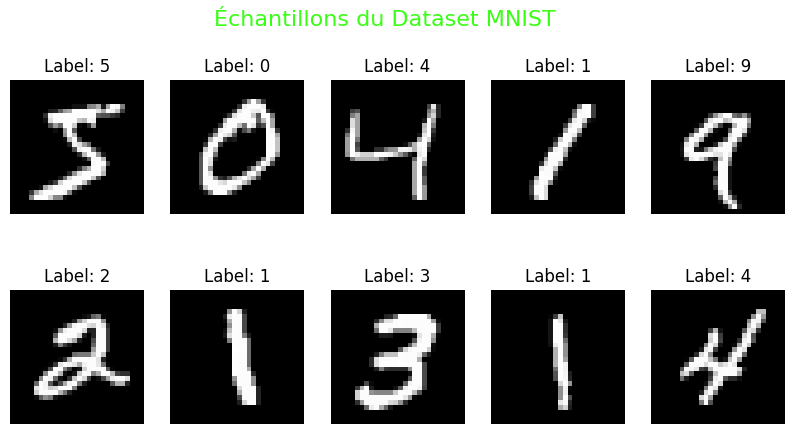

In [ ]:
# Chargement du dataset MNIST directement depuis Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Affichons quelques informations sur nos données
print("--- Exploration du Dataset ---")
print(f"Nombre d'images d'entraînement : {x_train.shape[0]}")
print(f"Nombre d'images de test : {x_test.shape[0]}")
print(f"Dimensions d'une image : {x_train[0].shape}")
print(f"Type de données des pixels : {x_train.dtype}")
print(f"Valeur minimale d'un pixel : {x_train.min()}")
print(f"Valeur maximale d'un pixel : {x_train.max()}")

# Visualisons quelques exemples pour mieux comprendre
print("\n--- Quelques exemples de manuscrits ---")
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Échantillons du Dataset MNIST", fontsize=16, color='#39FF14')
plt.show()

---
## 🪄 Étape 3 : Préparation des "Matériaux Magiques" (Prétraitement)

Notre modèle CNN a besoin que les données soient dans un format spécifique pour les traiter correctement.

1.  **Redimensionnement (Reshaping) :** Nos couches de convolution attendent une 4ème dimension pour le "canal" de couleur. Comme nos images sont en niveaux de gris, ce canal sera de 1. On passe de `(60000, 28, 28)` à `(60000, 28, 28, 1)`.
2.  **Normalisation :** Les réseaux de neurones fonctionnent mieux lorsque les valeurs d'entrée sont petites. Nous allons normaliser les valeurs des pixels (qui vont de 0 à 255) pour qu'elles soient comprises entre 0 et 1. C'est très simple : il suffit de diviser par 255.
3.  **Encodage des Labels (One-Hot Encoding) :** Notre modèle va prédire des probabilités pour chaque classe (0 à 9). Il est plus efficace de transformer nos labels (ex: `5`) en un vecteur où seule la 5ème position est à 1 (ex: `[0,0,0,0,0,1,0,0,0,0]`). C'est ce qu'on appelle le "One-Hot Encoding".

In [ ]:
# 1. Redimensionnement pour ajouter le canal de couleur
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# 2. Normalisation des pixels
# On convertit en float32 pour la division décimale
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. One-Hot Encoding des labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("--- Données Prétraitées ---")
print("Nouvelle forme de x_train:", x_train.shape)
print("Exemple de label original:", y_train[0])
print("Exemple de label après One-Hot Encoding:", y_train_cat[0])

--- Données Prétraitées ---
Nouvelle forme de x_train: (60000, 28, 28, 1)
Exemple de label original: 5
Exemple de label après One-Hot Encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


---
## 🔥 Étape 4 : Le Blueprint de l'Œil (Architecture du CNN)

C'est ici que nous dessinons le plan de notre Œil Artificiel. Nous allons empiler les briques conceptuelles que nous avons vues : `Conv2D` et `MaxPooling2D`.

### L'Intuition derrière notre Architecture
1.  **Première `Conv2D` :** Elle apprendra à détecter des motifs très simples et locaux (bords droits, courbes, coins).
2.  **Première `MaxPooling2D` :** Elle résume les résultats et rend le modèle plus robuste.
3.  **Deuxième `Conv2D` :** En travaillant sur les cartes de caractéristiques de la couche précédente, elle apprendra à combiner les bords et les courbes pour former des motifs plus complexes (un cercle, deux lignes parallèles, etc.).
4.  **`Flatten` :** Aplatit le résultat 2D en un long vecteur pour le donner au "cerveau" final.
5.  **`Dense` :** Le classifieur qui regarde le vecteur de caractéristiques et prend la décision finale.

### La Théorie : L'Opération de Convolution
L'opération au cœur du CNN est la convolution. Pour un pixel de sortie $G[i,j]$, l'opération est une somme pondérée des pixels d'entrée $I$ avec les poids du filtre $K$.
$$ G[i, j] = (I * K)[i, j] = \sum_{u} \sum_{v} I[i+u, j+v] \cdot K[u, v] $$
Les poids dans $K$ sont ce que le réseau apprend !

![IMDb Logo](https://miro.medium.com/v2/resize:fit:1200/0*NzssUXXCX9Vs1-YP.jpeg)

In [ ]:
# Le code exact vu dans la présentation !
# On construit le modèle brique par brique.

model_cnn = Sequential([
  # Étape 1: Extraire les caractéristiques de bas niveau
  # 32 filtres pour apprendre 32 motifs différents.
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

  # On résume l'information
  MaxPooling2D(pool_size=(2, 2)),

  # Étape 2: Combiner les caractéristiques pour en former de plus complexes
  # On utilise 64 filtres pour capturer plus de complexité.
  Conv2D(64, kernel_size=(3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),

  # Étape 3: Préparer pour la décision finale
  # On transforme notre carte 2D de features en un vecteur 1D.
  Flatten(),

  # Dropout est une technique de régularisation pour éviter que le modèle "apprenne par coeur".
  # Il "éteint" aléatoirement 50% des neurones pendant l'entraînement.
  Dropout(0.5),

  # Étape 4: Le "cerveau" qui décide quel chiffre c'est
  # 10 neurones de sortie, un pour chaque chiffre (0-9).
  # 'softmax' transforme les sorties en une distribution de probabilité.
  Dense(10, activation='softmax')
])

# Affichons le plan de notre architecture
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

---
## ⚙️ Étape 5 : La Forge en Action (Compilation et Entraînement)

Maintenant que le plan est prêt, il est temps d'allumer la forge.

1.  **Compiler le modèle :** On doit définir trois choses :
    - **`optimizer` :** L'algorithme qui met à jour les poids du réseau (la "stratégie d'apprentissage"). `adam` est un excellent choix par défaut.
    - **`loss` :** La fonction de coût qui mesure à quel point le modèle se trompe. `categorical_crossentropy` est le standard pour la classification multi-classes avec one-hot encoding.
    - **`metrics` :** La métrique que l'on veut suivre. On veut voir l'`accuracy` (le pourcentage de prédictions correctes).

2.  **Entraîner le modèle (`fit`) :** On lance le processus d'apprentissage. Le modèle va regarder les images d'entraînement, faire des prédictions, mesurer son erreur, et ajuster ses poids pour s'améliorer, encore et encore.

In [ ]:
# Compilation du modèle
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Lançons la forge !
print("--- Lancement de l'entraînement ---")
# Une "epoch" est un passage complet sur tout le dataset d'entraînement.
# batch_size définit combien d'images le modèle regarde avant de mettre à jour ses poids.
history = model_cnn.fit(x_train, y_train_cat,
                        epochs=5,  # 5 époques pour une démo rapide
                        batch_size=128,
                        validation_data=(x_test, y_test_cat),
                        verbose=1)

print("\n--- Entraînement terminé ! ---")

--- Lancement de l'entraînement ---
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7917 - loss: 0.6885 - val_accuracy: 0.9756 - val_loss: 0.0836
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9657 - loss: 0.1105 - val_accuracy: 0.9835 - val_loss: 0.0507
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9753 - loss: 0.0757 - val_accuracy: 0.9861 - val_loss: 0.0419
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9793 - loss: 0.0671 - val_accuracy: 0.9870 - val_loss: 0.0345
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9820 - loss: 0.0574 - val_accuracy: 0.9890 - val_loss: 0.0314

--- Entraînement terminé ! ---


---
## 🏆 Étape 6 : L'Épreuve du Feu (Évaluation et Prédictions)

Notre Œil Artificiel a été forgé. Est-il performant ? Il est temps de le tester sur des manuscrits qu'il n'a jamais vus.

### Analyse des Courbes d'Apprentissage
Tracer l'évolution de la `loss` et de l'`accuracy` pendant l'entraînement est le meilleur moyen de diagnostiquer notre modèle.
- **Accuracy :** On veut que l'accuracy d'entraînement et de validation augmentent et convergent.
- **Loss :** On veut que la loss d'entraînement et de validation diminuent et convergent.
- **Écart :** Un grand écart entre les courbes d'entraînement et de validation est un signe de **surapprentissage** (overfitting).

Perte sur le jeu de test (Loss) : 0.0314
Précision sur le jeu de test (Accuracy) : 98.90%


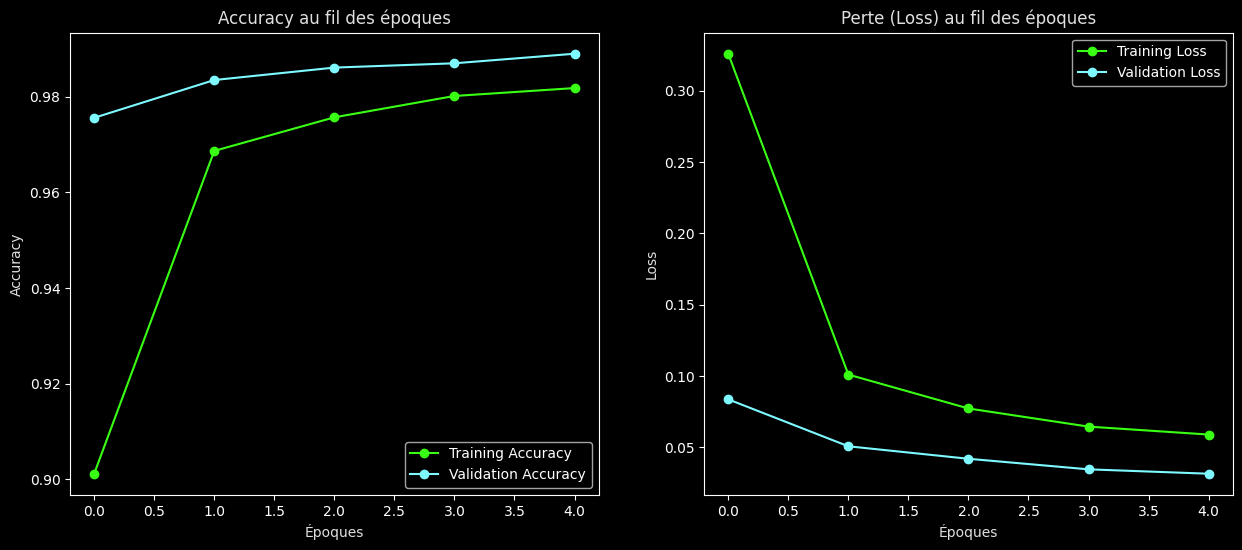

In [ ]:
# Évaluation finale sur le jeu de test
score = model_cnn.evaluate(x_test, y_test_cat, verbose=0)
print(f"Perte sur le jeu de test (Loss) : {score[0]:.4f}")
print(f"Précision sur le jeu de test (Accuracy) : {score[1]*100:.2f}%")

# Fonction pour tracer les courbes d'apprentissage
def plot_history(history):
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Courbe de l'accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy', color='#39FF14', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#7DF9FF', marker='o')
    ax1.set_title('Accuracy au fil des époques', color='#E0E0E0')
    ax1.set_xlabel('Époques', color='#E0E0E0')
    ax1.set_ylabel('Accuracy', color='#E0E0E0')
    ax1.legend()

    # Courbe de la perte (loss)
    ax2.plot(history.history['loss'], label='Training Loss', color='#39FF14', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='#7DF9FF', marker='o')
    ax2.set_title('Perte (Loss) au fil des époques', color='#E0E0E0')
    ax2.set_xlabel('Époques', color='#E0E0E0')
    ax2.set_ylabel('Loss', color='#E0E0E0')
    ax2.legend()

    plt.show()

plot_history(history)

### Faisons une prédiction sur une image !

Voyons notre modèle en action sur quelques images de test.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


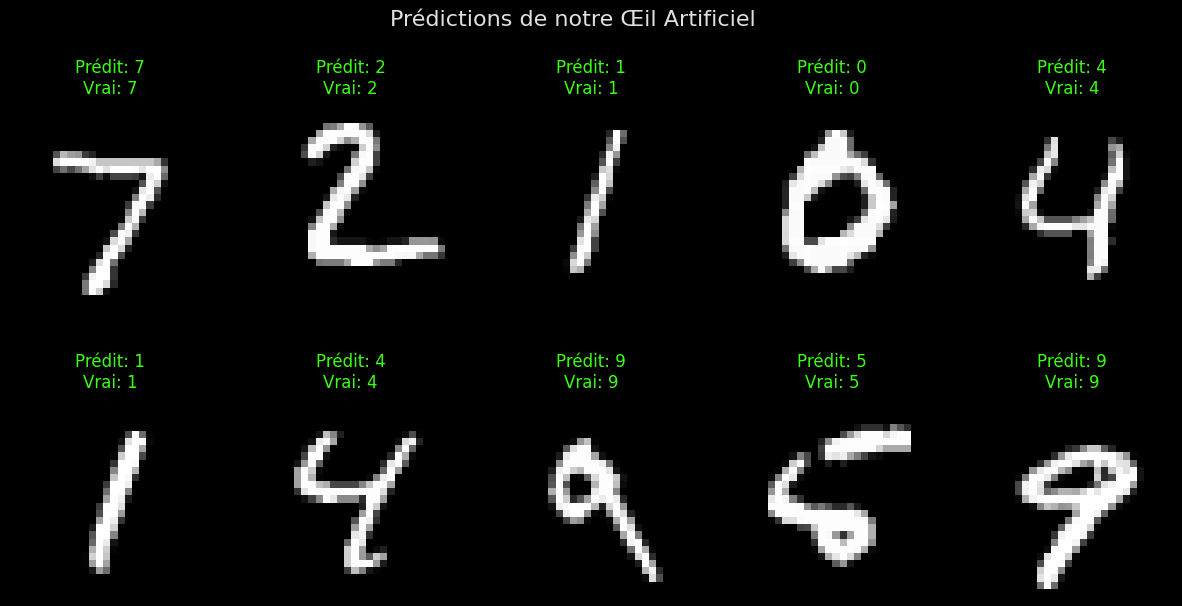

In [ ]:
# Sélection de quelques images de test
sample_images = x_test[:10]
sample_labels = y_test[:10]

# Prédictions
predictions = model_cnn.predict(sample_images)

# Affichage des résultats
plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    # La prédiction est un vecteur de probabilités. On prend l'index de la plus haute probabilité.
    predicted_label = np.argmax(predictions[i])
    true_label = sample_labels[i]

    # La couleur du titre dépend si la prédiction est correcte
    title_color = '#39FF14' if predicted_label == true_label else '#F900F9'

    plt.title(f"Prédit: {predicted_label}\nVrai: {true_label}", color=title_color)
    plt.axis('off')

plt.suptitle("Prédictions de notre Œil Artificiel", fontsize=16, color='#E0E0E0')
plt.show()

---
## ✅ Conclusion de la Quête n°1

**Félicitations, Artisan du Deep Learning !**

Nous avons réussi notre première quête. Nous avons forgé un Œil Artificiel, un CNN, capable de lire des chiffres manuscrits avec une très grande précision.

**Ce que nous avons appris :**
- L'importance de la **convolution** pour détecter les motifs.
- L'utilité du **pooling** pour résumer et robustifier.
- Comment assembler ces briques pour créer un modèle de vision par ordinateur de bout en bout.

Nous avons maintenant notre première création. Il est temps de passer à la quête suivante : forger une Voix.